In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\manro\AppData\Local\Temp\ipykernel_20296\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# Query using the session and SQLAlchemy ORM to find the most recent date
recent_date = session.query(func.max(Measurement.date)).scalar()

print(f"{recent_date}")


2017-08-23


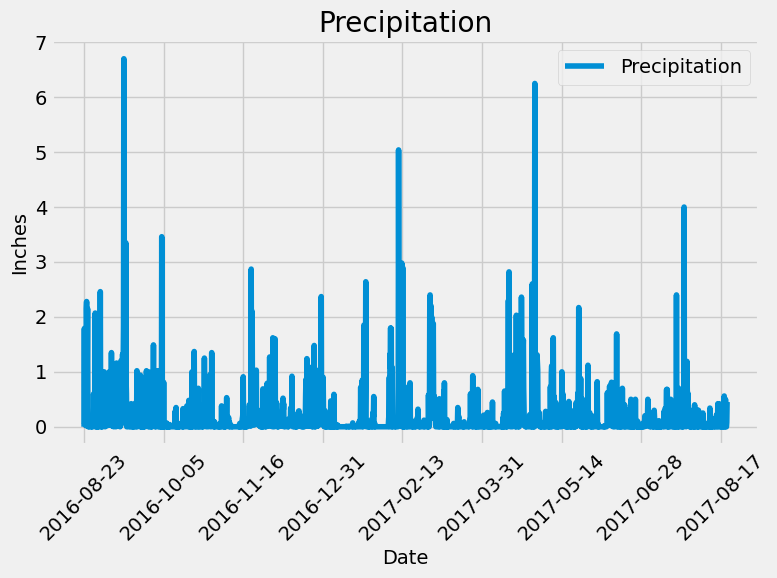

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database and ending it with the most recent date 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()

# Saving the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data).set_index('date')
precipitation_df = precipitation_df.rename(columns={'prcp':'Precipitation'})

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(8, 6), rot=45, legend=True, title="Precipitation")

# Customize the plot using Pandas built-in parameters
plt.xlabel("Date", fontsize=14)
plt.ylabel("Inches", fontsize=14)

# Save the figure
plt.savefig("Precipitation_analysis.png")

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
#summary statistics for the precipitation data
summary_statistics = precipitation_df.describe()

# Display the summary statistics
summary_statistics

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations_available = session.query(Station.id).count() 
print(f'{[((stations_available,))]}')

[(9,)]


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_active = session.query(Measurement.station, func.count(Measurement.station)).group_by\
    (Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive_station = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == mostactive_station).all()

[(54.0, 85.0, 71.66378066378067)]

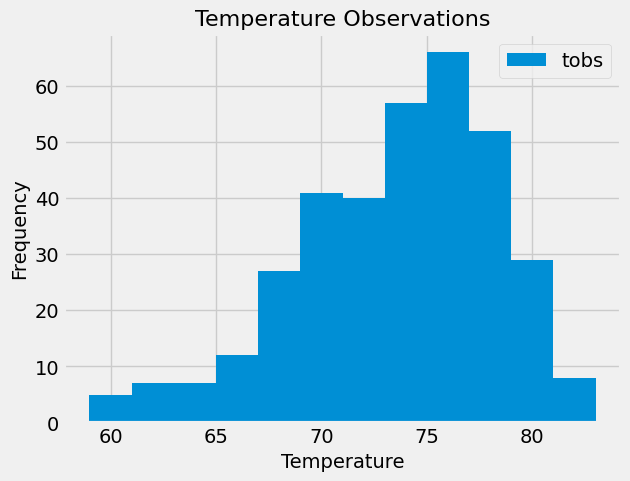

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_observation = stations_active[0][0]

results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").filter(Measurement.station == highest_observation).all()

# convert to dataframe
results_df = pd.DataFrame(results)

# Creating historgram 
results_df.plot.hist(bins=12)

# Labels and title
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Temperature Observations", fontsize=16)
# Save the figure (optional)
plt.savefig("Temperature_Histogram.png")

# Display the plot
plt.show()

# Close Session

In [16]:
# Close Session
session.close()